Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента

Коэффициент линейной регрессии а: 444.177
Коэффициент линейной регрессии b: 2.621


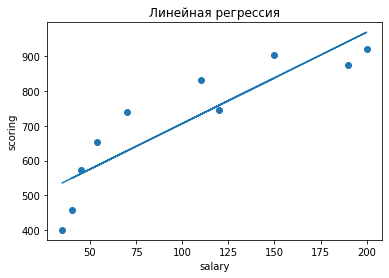

Коэффициент детерминации: 0.788
Средняя ошибка аппроксимации: 10.823
так как рассчитанный критерий Фишера F = 29.672 больше, чем табличный Ft = 5.32 то модель является значимой


(-3.456277703929877, 5.456277703929877)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

# Парная регрессия y=a+b*x
sum = 0
for i in range(len(salary)): 
    sum += salary[i] * scoring[i]
    
b = ((sum / len(salary)) - np.mean(salary) * np.mean(scoring))/ (np.std(salary)**2)
a = np.mean(scoring) - b * np.mean(salary)
print(f'Коэффициент линейной регрессии а:',round(a,3))
print(f'Коэффициент линейной регрессии b:',round(b,3))

# Построение графика
y =[]
for i in range(len(salary)):
    y.append(a + b * salary[i])

plt.scatter(salary, scoring)
plt.plot(salary, y)
plt.title('Линейная регрессия')
plt.xlabel('salary')
plt.ylabel('scoring')
plt.show()

# Расчет коэффициента детерминации, среднюю ошибку аппроксимации
r = b * np.std(salary) / np.std(scoring)
R2 = r**2
print(f'Коэффициент детерминации:',round(R2,3))

sum_y = 0
for i in range(len(salary)):
    sum_y += abs(y[i] - scoring[i]) / y[i]
A = sum_y * 100 / len(salary)
print(f'Средняя ошибка аппроксимации:',round(A,3))

# Оценка уравнение регрессии с помощью F-критерия Фишера
k = 1 # количество объясняющих переменных
f1 = k
f2 = len(salary) - k - 1
F = (R2 / (1-R2)) * f2 / f1
Ft = 5.32 # Табличное значения критерия Фишера (F-критерия) для уровня значимости p = 0.05
if F > Ft:
    print(f'Так как рассчитанный критерий Фишера F =',round(F,3) ,'больше, чем табличный Ft =',Ft,'то модель является значимой')
else:
    print(f'Так как рассчитанный критерий Фишера F =',round(F,3) ,'меньше, чем табличный Ft =',Ft,'то модель не является значимой')
    
# Построение для коэффициентов регрессии доверительных интервалов с помощью t-статистики Стьюдента 
t.interval(0.95, 10, loc=1, scale=2)

Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?



Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
"x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
"y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
"x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
"y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
"x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
"y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
"x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
"y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:
выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

b = [1.3328425840022728, 1.3324840674549725, 1.33337537779373, 1.333656996887274]
a = [-4.4946741651113635, -4.491447516185662, -4.500378400143571, -4.502003881076376]
mean_x = [9.0, 9.0, 9.0, 9.0]
mean_y = [7.500909090909093, 7.50090909090909, 7.5, 7.500909090909091]
var_x = [10.0, 10.0, 10.0, 10.0]
var_y = [3.7520628099173554, 3.752390082644628, 3.747836363636364, 3.7484082644628103]
r1 = [2.1759244386498433, 2.1752442790408772, 2.178021290923141, 2.1783151121227187]
y_lr = [[8.833751674911365, 6.168066506906819, 12.832279426918184, 7.500909090909093, 10.166594258913637, 14.165122010920456, 3.502381338902274, 0.8366961708977279, 11.499436842915912, 4.835223922904546, 2.1695387549000005], [8.833393158364062, 6.168425023454118, 12.83084536072898, 7.50090909090909, 10.165877225819035, 14.163329428183953, 3.5034568885441733, 0.8384887536342278, 11.498361293274009, 4.8359409559991455, 2.1709728210892], [8.833375377793729, 6.166624622206269, 12.83350151117492, 7.5, 10.16675075558746, 14.16

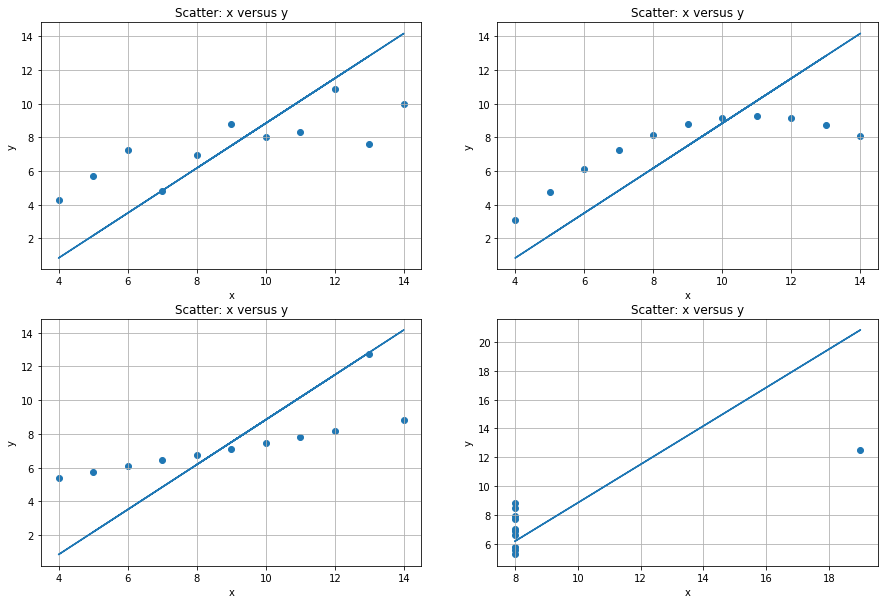

--- 0.411745548248291 seconds ---


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()

data = [[[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]], 
        [[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]], 
        [[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]], 
        [[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]]]

a,b = [],[]
mean_x,mean_y = [], []
var_x,var_y = [], []
r1 = []
y_lr =[]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i in range(len(data)):
    # Парная регрессия y=a+b*x
    sum = 0
    for j in range(len(data[i][0])): 
        sum += data[i][0][j] * data[i][1][j]

    b.append(((sum / len(data[i][0])) - np.mean(data[i][0]) * np.mean(data[i][1]))/ (np.std(data[i][1])**2))
    a.append(np.mean(data[i][1]) - b[i] * np.mean(data[i][0]))
    
    # рассчет выборочного среднее и дисперсию каждой выборки, коэффициент корреляции Пирсона 
    mean_x.append(np.mean(data[i][0]))
    mean_y.append(np.mean(data[i][1]))
    var_x.append(np.var(data[i][0]))
    var_y.append(np.var(data[i][1]))
    r1.append(b[i] * np.std(data[i][0]) / np.std(data[i][1])) # коэффициент корреляции Пирсона
    
    # прямая линейной регрессии
    y1_lr = []
    for y in range(len(data[i][1])):
        y1_lr.append(a[i] + b[i] * data[i][0][y])
    y_lr.append(y1_lr)

# scatter plot по каждой паре выборок
count = 0
for k in range(0,2):
    for m in range(0,2):
        axs[k,m].scatter(data[count][0], data[count][1])
        axs[k,m].plot(data[count][0], y_lr[count])
        axs[k,m].set_title('Scatter: x versus y')
        axs[k,m].set_xlabel('x')
        axs[k,m].set_ylabel('y')
        axs[k,m].grid()
        count += 1
    
print(f'b =',b)
print(f'a =',a)
print(f'mean_x =',mean_x)
print(f'mean_y =',mean_y)
print(f'var_x =',var_x)
print(f'var_y =',var_y)
print(f'r1 =',r1)
print(f'y_lr =',y_lr)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))